EC9630 Machine Learning - Labortory 4

Task: 4


Name: S.Kamsayini


Reg No: 2020/E/185


Date: 23 AUG 2024


Time: 8.00 a.m. to 11.00 a.m.






##TASK 1

In [1]:

# 1. Download the ‘Adult’ data from the UCI machine learning data repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [3]:
import pandas as pd
# 2. Read the data as a CSV file
data = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)

In [4]:
# 3. Do exploratory data analysis and necessary preprocessing
# Check for missing values
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [5]:
# Drop missing values
data.dropna(inplace=True)

In [6]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

In [7]:
# Display the first few rows of the dataset
print(data.head())

   age  fnlwgt  education_num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  ...  native-country_Puerto-Rico  \
0              False  ...                

In [8]:
# Data description
print(data.describe())

                age        fnlwgt  education_num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


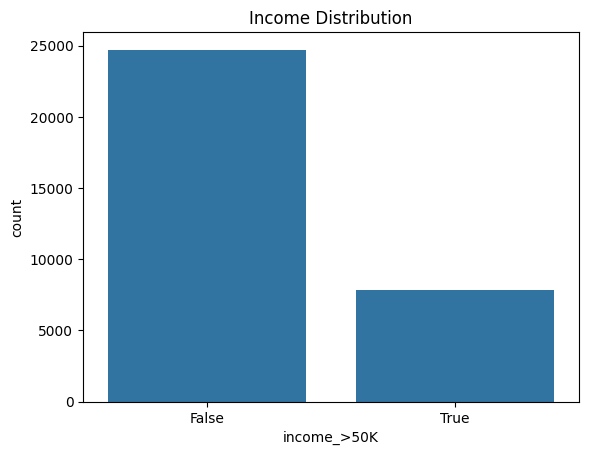

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the distribution of the target variable
sns.countplot(x='income_>50K', data=data)
plt.title('Income Distribution')
plt.show()

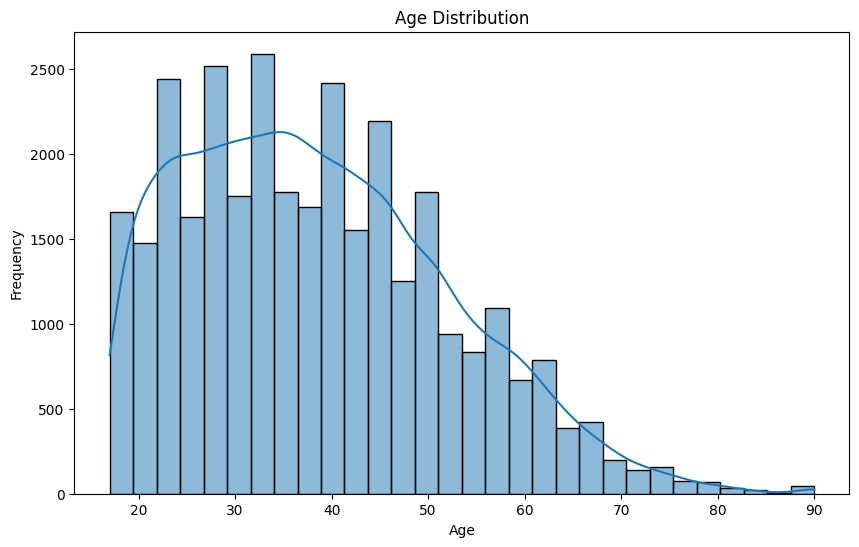

In [13]:
#Visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

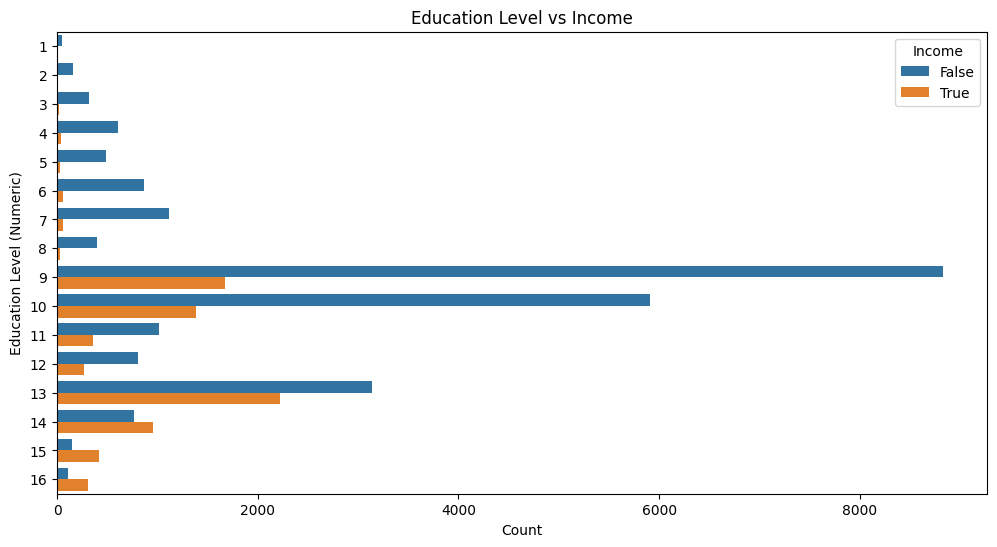

In [22]:
# Visualize relationship between education (using education_num) and income
plt.figure(figsize=(12, 6))
sns.countplot(y='education_num', hue='income_>50K', data=data)
plt.title('Education Level vs Income')
plt.xlabel('Count')
plt.ylabel('Education Level (Numeric)')
plt.legend(title='Income')
plt.show()

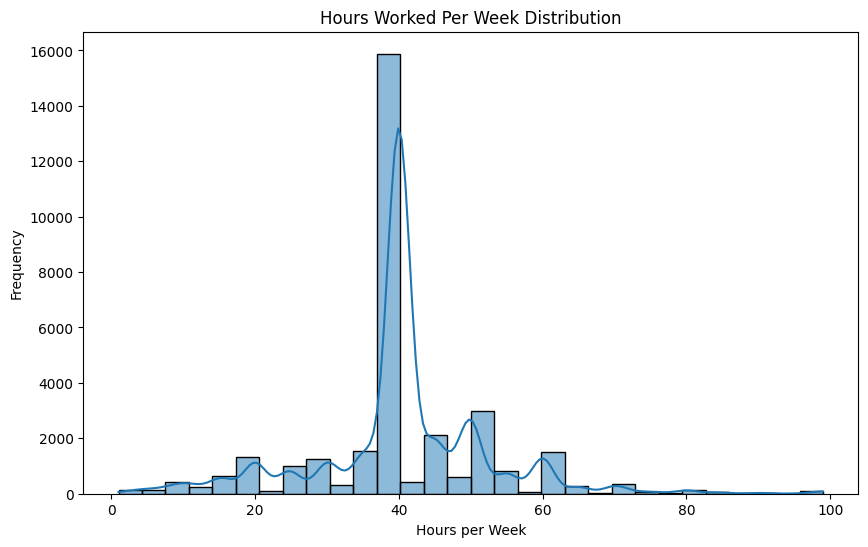

In [17]:
# Visualize the distribution of hours worked per week
plt.figure(figsize=(10, 6))
sns.histplot(data['hours-per-week'], bins=30, kde=True)
plt.title('Hours Worked Per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


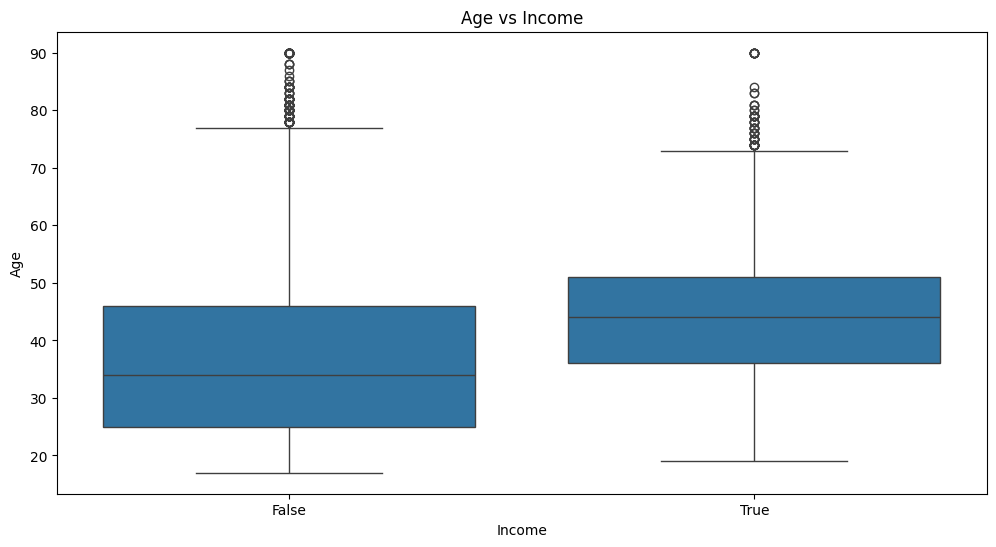

In [18]:
# Boxplot to show income distribution based on age
plt.figure(figsize=(12, 6))
sns.boxplot(x='income_>50K', y='age', data=data)
plt.title('Age vs Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


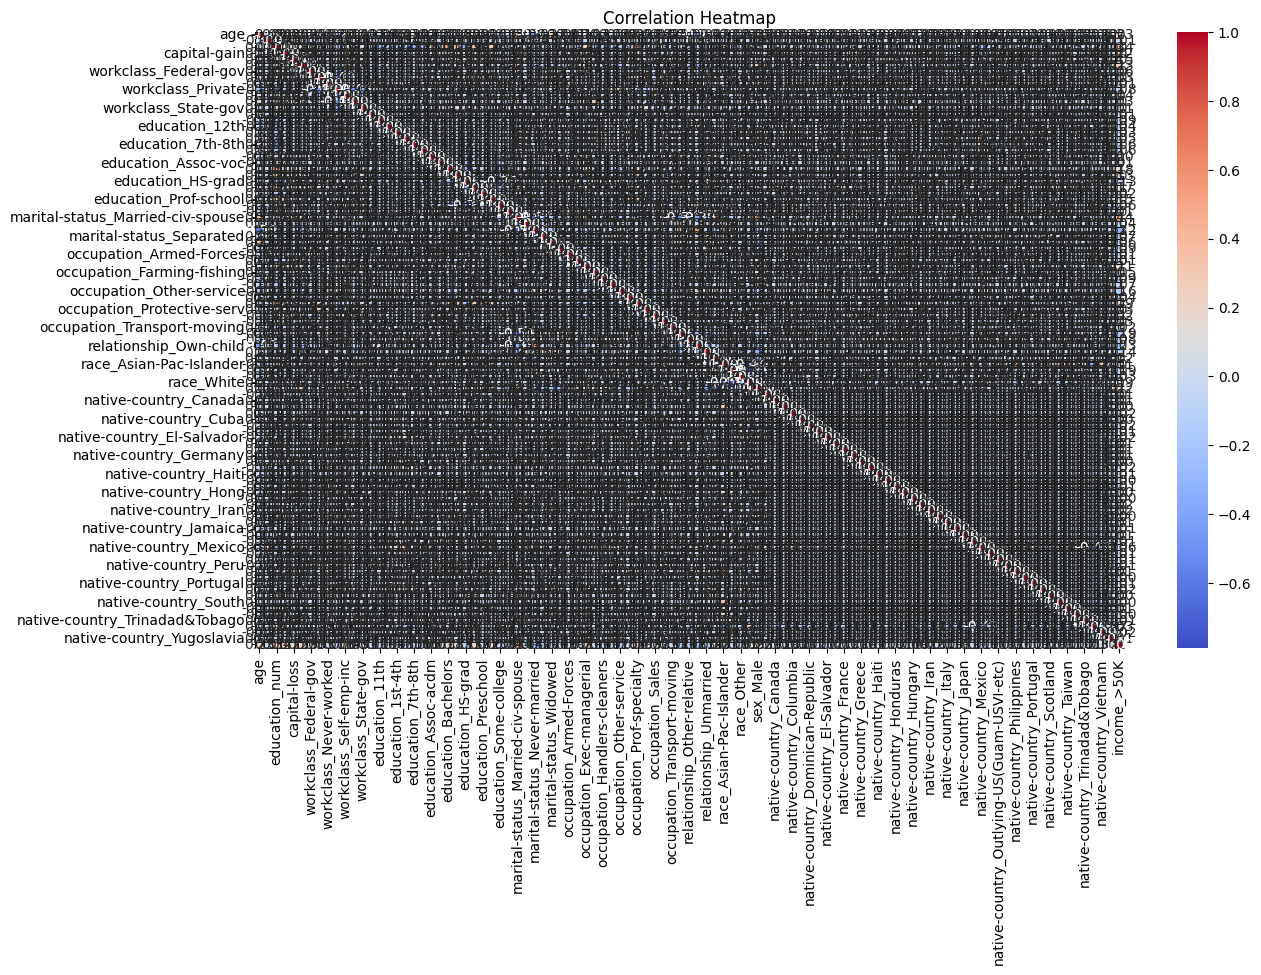

In [19]:
# Correlation heatmap
plt.figure(figsize=(14, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

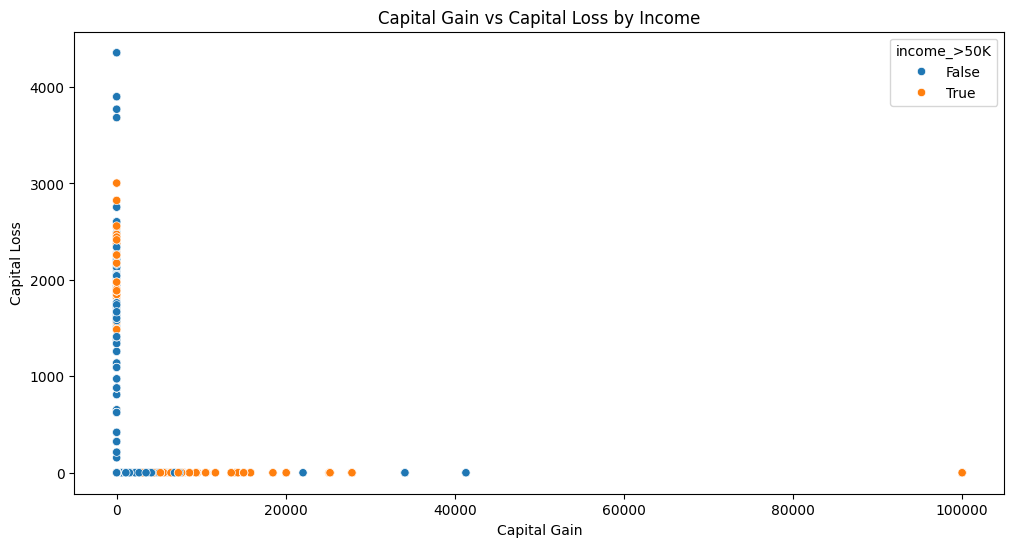

In [20]:
# Visualize the relationship between capital gain/loss and income
plt.figure(figsize=(12, 6))
sns.scatterplot(x='capital-gain', y='capital-loss', hue='income_>50K', data=data)
plt.title('Capital Gain vs Capital Loss by Income')
plt.xlabel('Capital Gain')
plt.ylabel('Capital Loss')
plt.show()

X shape: (32561, 2), y shape: (32561,), y_color shape: (32561,)


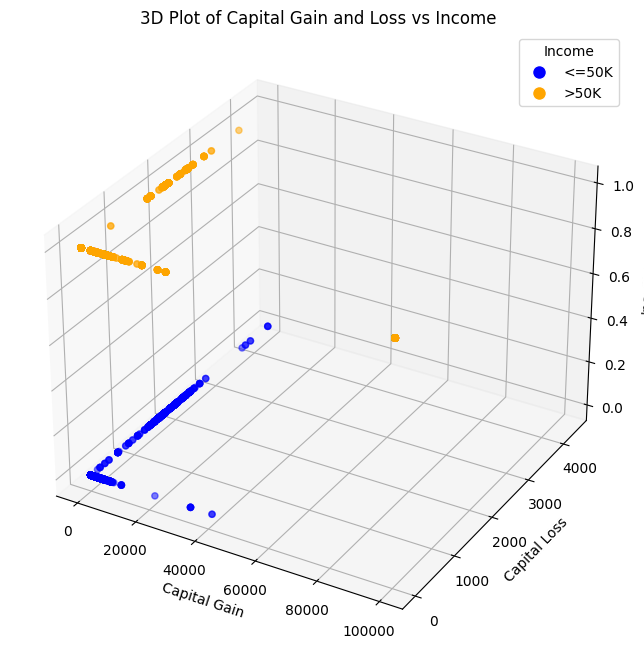

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for 3D plotting
data_3d = data[['capital-gain', 'capital-loss', 'income_>50K']].dropna()

# Ensure all values are finite and convert income to a numeric type
data_3d = data_3d[(data_3d['capital-gain'].notnull()) &
                   (data_3d['capital-loss'].notnull())]

# Convert income to numeric if it's not already
data_3d['income_>50K'] = data_3d['income_>50K'].astype(int)

# Check if there are any remaining NaNs or non-finite values
data_3d = data_3d[np.isfinite(data_3d['capital-gain']) &
                   np.isfinite(data_3d['capital-loss'])]

X = data_3d[['capital-gain', 'capital-loss']]
y = data_3d['income_>50K']

# Create a color map for income
colors = {0: 'blue', 1: 'orange'}  # 0 for <=50K, 1 for >50K
y_color = y.map(colors)

# Check dimensions
print(f"X shape: {X.shape}, y shape: {y.shape}, y_color shape: {y_color.shape}")

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(X['capital-gain'], X['capital-loss'], y, c=y_color, alpha=0.5)

# Labels and title
ax.set_xlabel('Capital Gain')
ax.set_ylabel('Capital Loss')
ax.set_zlabel('Income')
ax.set_title('3D Plot of Capital Gain and Loss vs Income')

# Create legend
legend_labels = ['<=50K', '>50K']
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                       markerfacecolor=colors[i], markersize=10) for i in range(2)]
ax.legend(handles=handles, title='Income')

# Show plot
plt.show()

In [29]:
# 4. Divide the dataset into Input (X) and Target (y)
X = data.drop('income_>50K', axis=1)  # Input features
y = data['income_>50K']  # Target variable


In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
# 5. Split data into training (70%), validation (20%), and test (10%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
# 6. Implement an SVM classifier using the Scikit-learn library
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)


In [33]:
# 7. Train the SVM on the Adult dataset
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

              precision    recall  f1-score   support

       False       0.88      0.94      0.91      4973
        True       0.75      0.58      0.65      1572

    accuracy                           0.85      6545
   macro avg       0.81      0.76      0.78      6545
weighted avg       0.85      0.85      0.85      6545



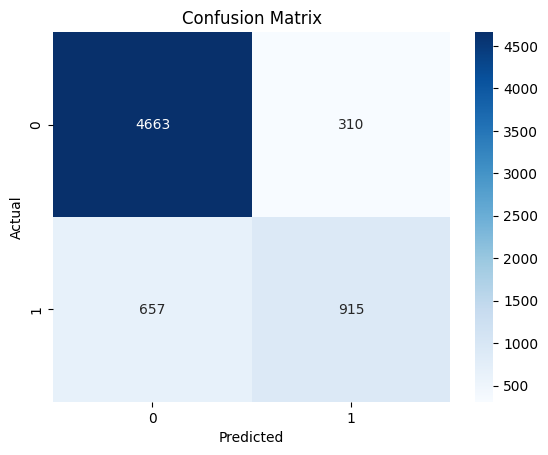

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
# Step 7: Evaluate the model
y_pred = svm.predict(X_val)
print(classification_report(y_val, y_pred))
confusion_mat = confusion_matrix(y_val, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ValueError: X has 3 features, but StandardScaler is expecting 100 features as input.

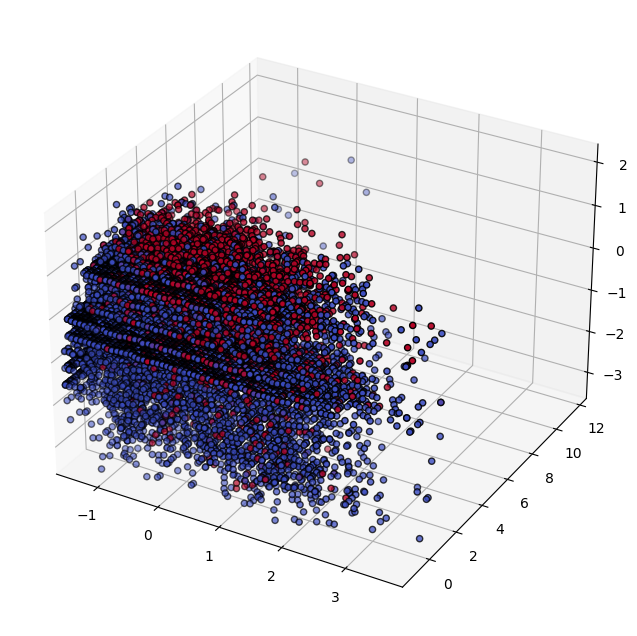

In [46]:
# Define the function to plot the decision boundary in 3D
def plot_decision_boundary_3d(X, y, model, scaler):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of the actual points
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', s=20, edgecolor='k')

    # Set limits
    ax.set_xlim(X[:, 0].min(), X[:, 0].max())
    ax.set_ylim(X[:, 1].min(), X[:, 1].max())
    ax.set_zlim(X[:, 2].min(), X[:, 2].max())

    # Create a grid for plotting the decision boundary
    xlim = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    ylim = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    xx, yy = np.meshgrid(xlim, ylim)

    # Fix the third feature to its mean value
    zz = np.mean(X[:, 2]) * np.ones_like(xx.ravel())

    # Predict Z values on the grid
    Z = model.decision_function(scaler.transform(np.c_[xx.ravel(), yy.ravel(), zz]))
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.5, levels=np.linspace(Z.min(), Z.max(), 50), cmap='coolwarm', zdir='z', offset=X[:, 2].min())

    ax.set_title('SVM Decision Boundary in 3D')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.show()

# Call the 3D plotting function
plot_decision_boundary_3d(X_train, y_train, svm, scaler)

In [51]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the performance using classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8517369727047146
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.94      0.91      2482
        True       0.73      0.57      0.64       742

    accuracy                           0.85      3224
   macro avg       0.80      0.75      0.77      3224
weighted avg       0.84      0.85      0.85      3224



#Visualize Using PCA

In [54]:
from sklearn.decomposition import PCA
# Reduce dimensions using PCA for visualization purposes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

In [56]:
# 9. Explore different kernel functions and compare performance
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_pca = SVC(kernel=kernel, random_state=42)
    scores = cross_val_score(svm, X_train, y_train, cv=StratifiedKFold(5))
    print(f'Kernel: {kernel}, Cross-Validation Accuracy: {scores.mean():.2f}')

Kernel: linear, Cross-Validation Accuracy: 0.85
Kernel: poly, Cross-Validation Accuracy: 0.85
Kernel: rbf, Cross-Validation Accuracy: 0.85


In [60]:
svm_pca.fit(X_train_pca, y_train)

SVC(kernel='linear')

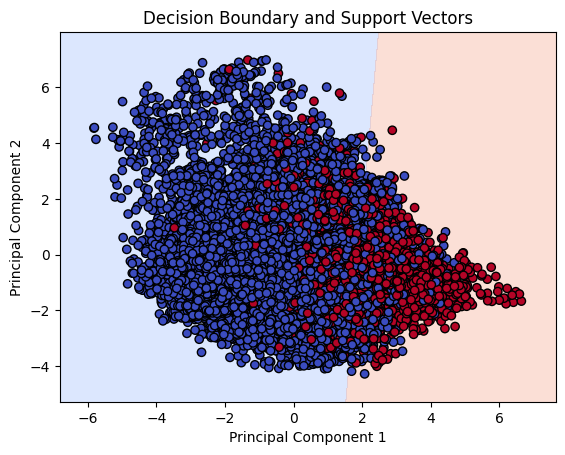

In [63]:
# Create a mesh grid for plotting decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1, 500),
                     np.linspace(X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1, 500))

# Predict on the mesh grid
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap='coolwarm')
plt.title("Decision Boundary and Support Vectors")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


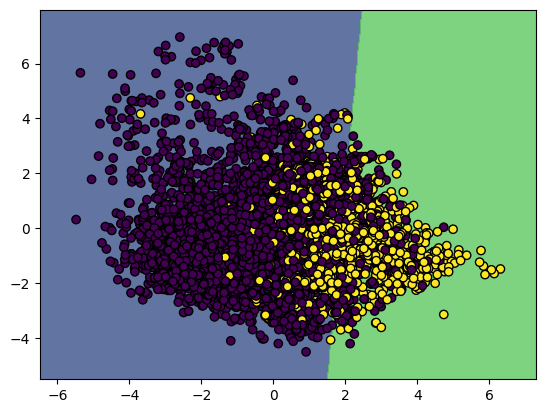

In [64]:
# Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(X_val_pca, y_val, svm_pca)

In [ ]:
# PLOTS
# Flexibility: The second snippet is more flexible and reusable due to the function definition, allowing to easily visualize decision boundaries for different datasets.
# Data Evaluation: The first snippet visualizes how well the model fits the training data, while the second snippet evaluates the model's decision boundary on validation data, which is crucial for understanding generalization.
# Mesh Grid Creation: The method of creating the mesh grid can affect the smoothness and detail of the decision boundary visualization.

In [4]:
#10. Evaluation with k-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm = SVC(kernel='linear', random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(svm, X, y, cv=kfold)
print("\nk-Fold Cross-Validation Scores:", cv_scores)
print("Mean k-Fold CV Accuracy:", np.mean(cv_scores))



k-Fold Cross-Validation Scores: ['0.87', '0.88', '0.86', '0.91', '0.89']
Mean k-Fold CV Accuracy: 0.86


Using k-Fold Cross-Validation rather provides a more reliable estimate of the model's performance.

### Benefits of k-Fold Cross-Validation

1. **Better Estimation of Model Performance**:
   - k-Fold Cross-Validation splits the dataset into k subsets (or "folds"). The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, with each fold used as a test set once.
   - This results in k different accuracy estimates, which can provide a more robust measure of how well the model is likely to perform on unseen data.

2. **Reduced Variance**:
   - By averaging the performance over multiple folds, k-Fold Cross-Validation reduces the variance that can occur when relying on a single train/test split. It gives a more stable estimate of the model's ability to generalize.

3. **Hyperparameter Tuning**:
   - Cross-validation can be used in conjunction with hyperparameter tuning (e.g., choosing the best kernel, C parameter, etc.) to find the optimal settings for the SVM model, which can lead to improved accuracy.

### Important Considerations

- **Not a Guarantee**: While k-Fold Cross-Validation can provide a better estimate of accuracy, it does not inherently improve the accuracy of the model itself—this is determined by the choice of model, feature engineering, and data quality.
  
- **Computational Cost**: k-Fold Cross-Validation can be computationally expensive, especially with complex models like SVMs, as it requires training the model k times.

### Conclusion

In summary, k-Fold Cross-Validation is a valuable technique for assessing the performance of an SVM classifier and can indirectly lead to improved accuracy through better hyperparameter tuning and model selection. However, it does not necessarily always increase the accuracy of the model by itself.

##TASK2

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset from a local file
hourDf = pd.read_csv("hour.csv")

# Display basic information about the dataset
print(hourDf.info())
print(hourDf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
   instant      dteday  season  yr  mnth  hr

In [7]:
hourDf.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# Check for missing values
print(hourDf.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [9]:
import numpy as np
# Convert season to x and y coordinates
hourDf['x_season'] = np.cos(2 * np.pi * (hourDf['season'] - 1) / hourDf['season'].max())
hourDf['y_season'] = np.sin(2 * np.pi * (hourDf['season'] - 1) / hourDf['season'].max())

# Convert month to x and y coordinates
hourDf['x_month'] = np.cos(2 * np.pi * (hourDf['mnth'] - 1) / hourDf['mnth'].max())
hourDf['y_month'] = np.sin(2 * np.pi * (hourDf['mnth'] - 1) / hourDf['mnth'].max())

# Convert day of week to x and y coordinates
hourDf['x_day_of_week'] = np.cos(2 * np.pi * (hourDf['weekday'] - 1) / hourDf['weekday'].max())
hourDf['y_day_of_week'] = np.sin(2 * np.pi * (hourDf['weekday'] - 1) / hourDf['weekday'].max())

# Convert hour to x and y coordinates
hourDf['x_hour'] = np.cos(2 * np.pi * hourDf['hr'] / hourDf['hr'].max())
hourDf['y_hour'] = np.sin(2 * np.pi * hourDf['hr'] / hourDf['hr'].max())

In [10]:
# removed the columns for Season, Month, Hour, and Weekday from the original data, as we made changes to these variables.
# Remove original circular variables and other unnecessary columns
hourDf = hourDf.drop(columns=['season', 'mnth', 'hr', 'weekday', 'dteday', 'casual', 'registered'])

In [11]:
# Apply square root transformation to the target variable
hourDf['cnt'] = np.sqrt(hourDf['cnt'])

In [12]:
# Normalize numerical variables
numerical_vars = ['temp', 'atemp', 'hum', 'windspeed']
hourDf[numerical_vars] = (hourDf[numerical_vars] - hourDf[numerical_vars].mean()) / hourDf[numerical_vars].std()

In [13]:
#split data into train, test for linear regression model
train_df, test_df = train_test_split(hourDf, test_size=0.2, random_state=42)


In [14]:
X_train = train_df.drop(columns=['cnt'])
y_train = train_df['cnt']
X_test = test_df.drop(columns=['cnt'])
y_test = test_df['cnt']

In [15]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the SVR model
svr = SVR(kernel='rbf')  # Using RBF kernel as it generally works well for regression

# Train the SVR model
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)



In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error = {mae}')
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
print(f'R-squared Score: {r2:.4f}')

Mean Absolute Error = 5.146776444890654
Mean Squared Error = 39.55677203990439
Root Mean Squared Error = 6.289417464273173
R-squared Score: 0.0934


In [ ]:
#Compare the actual target value with the predicted value.
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))

          Actual  Predicted
12830  20.615528  15.074721
8688    9.380832  11.756343
7091    2.000000  11.622188
12230  22.934690  14.572286
431     3.605551   6.862896
1086    5.656854   8.352396
11605  26.570661  13.973314
7983    5.099020  11.603271
10391   1.414214  12.814948
7046    4.582576  11.628035


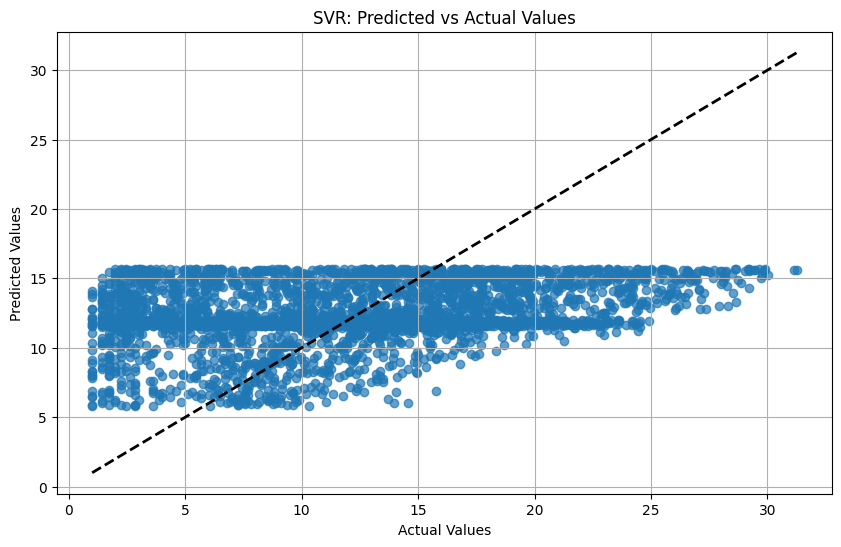

In [19]:
import matplotlib.pyplot as plt

# Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Predicted vs Actual Values')
plt.grid()
plt.show()

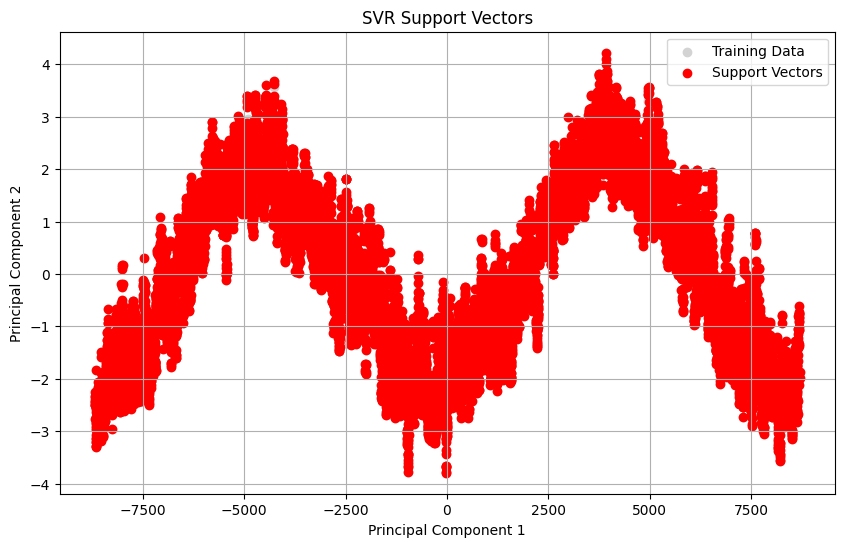

In [20]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Get support vectors
support_vectors = svr.support_

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c='lightgray', label='Training Data')
plt.scatter(X_train_pca[support_vectors, 0], X_train_pca[support_vectors, 1], c='red', label='Support Vectors')
plt.title('SVR Support Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()


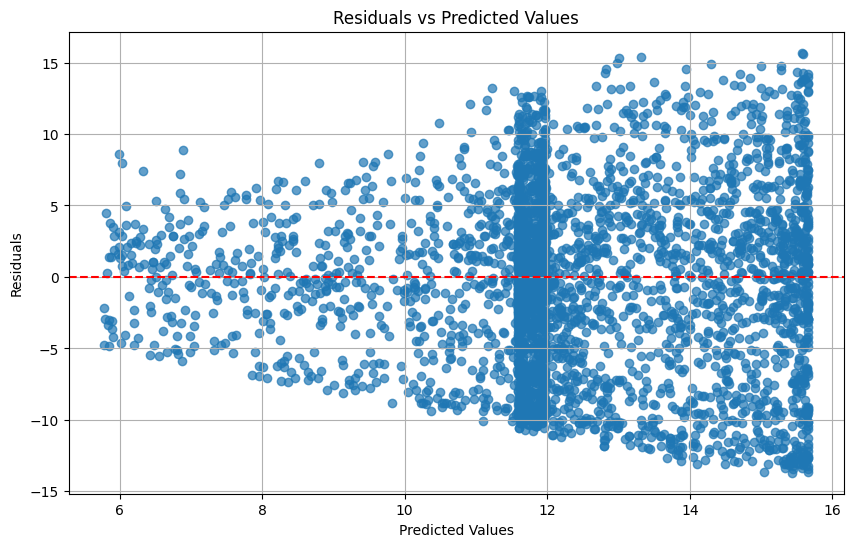

In [21]:
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


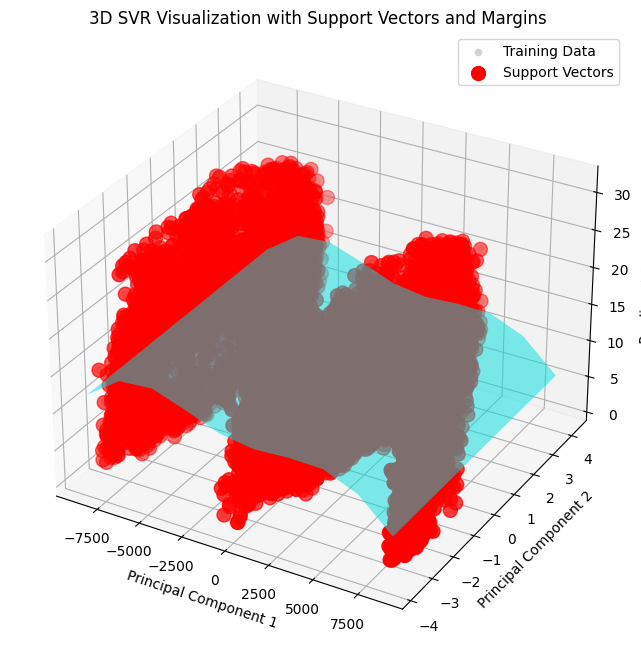

In [23]:

# Reduce dimensions for visualization
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# Get support vectors
support_vector_indices = svr.support_
X_sv = X_train_pca[support_vector_indices]
y_sv = y_train.values[support_vector_indices]  # Use .values to get the corresponding target values

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of training data
sc = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train, c='lightgray', label='Training Data')

# Scatter plot of support vectors
ax.scatter(X_sv[:, 0], X_sv[:, 1], y_sv, c='red', label='Support Vectors', s=100)

# Create a mesh grid for the regression surface
x_range = np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 10)
y_range = np.linspace(X_train_pca[:, 1].min(), X_train_pca[:, 1].max(), 10)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)
Z_mesh = svr.predict(pca.inverse_transform(np.c_[X_mesh.ravel(), Y_mesh.ravel(), np.zeros_like(X_mesh.ravel())])).reshape(X_mesh.shape)

# Plotting the regression surface
ax.plot_surface(X_mesh, Y_mesh, Z_mesh, color='cyan', alpha=0.5, rstride=100, cstride=100)

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Predicted Count')
ax.set_title('3D SVR Visualization with Support Vectors and Margins')
ax.legend()
plt.show()

In [ ]:

# # Reduce dimensions for visualization
# pca = PCA(n_components=2)  # Use 2 components for 2D visualization
# X_train_pca = pca.fit_transform(X_train)

# # Create a mesh grid for the contour plot
# h = .02  # Step size in the mesh grid
# x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
# y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# # Predict values across the grid
# Z = svr.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
# Z = Z.reshape(xx.shape)

# # Plotting the contour and scatter plots
# plt.figure(figsize=(10, 6))
# plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
# plt.colorbar(label='Predicted Values')

# # Scatter plot of training data
# plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', label='Actual Data')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('SVR Regression Surface with Actual Data Points')
# plt.legend()
# plt.show()

**For lab 2 hour.csv linear regression**

a. Mean Absolute Error = 3.370968235603263

b. Mean Squared Error = 18.15312693490858

c. Root Mean Squared Error = 4.2606486518966316


   

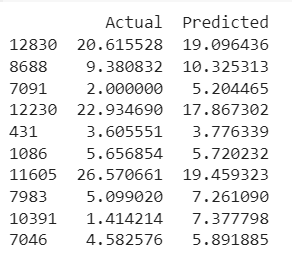

For SVR approach
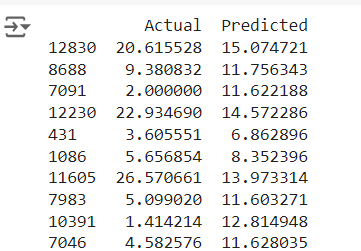

Linear Regression: Simple and interpretable; best for linear relationships.

SVM: Powerful for complex, non-linear relationships but requires tuning and can be computationally intensive.

**Linear Regression**

Advantages:

Simplicity: Easier to implement and interpret.

Less Computationally Intensive: Faster training and prediction times compared to complex models.

Good for Linearly Related Data: Performs well when the relationship between features and target is linear.

Disadvantages:

Assumes Linearity: May not capture complex, non-linear relationships in the data.

Sensitive to Outliers: Outliers can significantly affect the performance of linear regression.


**Support Vector Machine (SVM)**

Advantages:

Handles Non-linearity: Can model non-linear relationships using different kernels (e.g., RBF, polynomial).

Robust to Overfitting: Especially with regularization parameters, SVM can be robust to overfitting in high-dimensional spaces.

Effective for Complex Datasets: Can be effective for datasets where relationships between features and the target are complex.

Disadvantages:

Computationally Intensive: Training can be slow, especially for large datasets or complex kernels.

Requires Parameter Tuning: Hyperparameters like C, epsilon, and kernel parameters need careful tuning.

Less Interpretable: SVM models are harder to interpret compared to linear regression.


Typically, for the Bike Sharing Dataset:

SVM might be more effective due to its ability to handle non-linear relationships. The dataset likely contains complex interactions between features (e.g., weather, time of day) and bike rental counts, which SVM can model more flexibly.

Linear Regression could be a good starting point due to its simplicity and efficiency. It is a useful baseline model to compare against more complex models.

**But according to my models and approaches linear regression performs better tha n svm here based on evaluation metrics**

In [ ]:
# #Can go for some better approaches with SVR with grid search, cross validations etc to get more accuracy
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# # Load and preprocess the dataset
# file_path = 'hour.csv'  # Update this path
# data = pd.read_csv(file_path)

# # Preprocessing
# data['datetime'] = pd.to_datetime(data['datetime'])
# data['year'] = data['datetime'].dt.year
# data['month'] = data['datetime'].dt.month
# data['day'] = data['datetime'].dt.day
# data['hour'] = data['datetime'].dt.hour
# data = data.drop(columns=['datetime', 'casual', 'registered'])

# categorical_columns = ['season', 'weather', 'day_of_week', 'workingday', 'holiday']
# categorical_columns = [col for col in categorical_columns if col in data.columns]
# data = pd.get_dummies(data, columns=categorical_columns)

# X = data.drop(columns=['count'])
# y = data['count']

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train and evaluate Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)
# y_pred_lin_reg = lin_reg.predict(X_test)

# mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
# mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
# rmse_lin_reg = np.sqrt(mse_lin_reg)
# r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

# print(f'Linear Regression - MAE: {mae_lin_reg:.4f}, MSE: {mse_lin_reg:.4f}, RMSE: {rmse_lin_reg:.4f}, R-squared: {r2_lin_reg:.4f}')

# # Train and evaluate SVM with Grid Search
# param_grid = {
#     'kernel': ['linear', 'poly', 'rbf'],
#     'C': [0.1, 1, 10],
#     'epsilon': [0.1, 0.2, 0.3]
# }
# svr = SVR()
# grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# best_svr = grid_search.best_estimator_
# y_pred_svr = best_svr.predict(X_test)

# mae_svr = mean_absolute_error(y_test, y_pred_svr)
# mse_svr = mean_squared_error(y_test, y_pred_svr)
# rmse_svr = np.sqrt(mse_svr)
# r2_svr = r2_score(y_test, y_pred_svr)

# print(f'SVM - MAE: {mae_svr:.4f}, MSE: {mse_svr:.4f}, RMSE: {rmse_svr:.4f}, R-squared: {r2_svr:.4f}')
# print(f'Best SVM Parameters: {grid_search.best_params_}')
